### Download the data and remove rows containing null values

In [1]:
# modules.data_module is a module we have created ourselves for useful data functions
import modules.data_module as dm
import pandas as pd

data_url = "https://corgis-edu.github.io/corgis/datasets/csv/graduates/graduates.csv"
data_path = "data/graduates.csv"

# Used to download and save for the first time
# dm.retrieve_data(data_url, save_to_file=True, save_path="data/graduates.csv")

data = dm.retrieve_data(data_path).set_index("Unnamed: 0")
data.index.name = "ID"

data

# Remove Salaries.Highest or Salaries.Lowest as the Salaries.Mean and Salaries.Median are of interest.
#data = data.drop(["Salaries.Lowest", "Salaries.Highest"], axis=1)
# Keep columns that are of interest.
data = data[["Demographics.Total", "Year", "Salaries.Mean", "Education.Major", "Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Minorities", "Demographics.Ethnicity.Whites", "Demographics.Gender.Females", "Demographics.Gender.Males"]]

# Remove all rows where any column in the row has a value of 0
data = data[(data != 0).all(1)]

# Remove all rows where column not equal to 1993 as 1993 was before the Dotcom Bubble from 1995-2001.
# As we don't have more data before 1993, it wouldn't make sense to use that data as we don't know if the values
# were at peak, lower or the same before then.
data = (data[data['Year'] != 1993])
# The above causes decimals on Year. Let's get rid of those (so our plot doesnt show decimal years)
data['Year'] = data['Year'].astype(str).replace('\.0', '', regex=True)

# Remove all rows where Education.Major is not: 
# "Biological Sciences", "Chemical Engineering", "Chemistry", "Civil Engineering", "Computer Science and Math",
# "Economics", "Electrical Engineering", "Management & Administration", "Mechanical Engineering", "Other Engineering"
# "Physics and Astronomy" or "Psychology"
#majors_of_interest = ["Biological Sciences", "Chemical Engineering", "Chemistry", "Civil Engineering", 
#                      "Computer Science and Math", "Economics", "Electrical Engineering", "Management & Administration", 
#                      "Mechanical Engineering", "Other Engineering","Physics and Astronomy", "Psychology"]

majors_of_interest = ["Computer Science and Math", "Economics", "Electrical Engineering", "Mechanical Engineering", "Other Engineering", "Chemistry", "Civil Engineering", "Psychology"]
data = data.loc[data['Education.Major'].isin(majors_of_interest)]

data

,Demographics.Total,Year,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,,,
49,507228,1995,60697.60,Chemistry,49393,36562,421046,140363,366865
50,345038,1995,51758.63,Civil Engineering,39586,18806,286397,24979,320059
51,1114519,1995,49672.61,Computer Science and Math,87310,103423,923026,401758,712760
52,658039,1995,50778.48,Economics,46146,42052,569841,157069,500970
53,675226,1995,58165.47,Electrical Engineering,88354,42981,543890,36905,638321
...,...,...,...,...,...,...,...,...,...
484,1302458,2015,109940.97,Economics,166195,195133,941130,403424,899034
485,1154661,2015,109173.61,Electrical Engineering,375520,155870,623271,149404,1005257
496,950566,2015,98533.83,Mechanical Engineering,184209,117901,648456,96727,853839


### Plot Salaries.Mean for the majors of interest

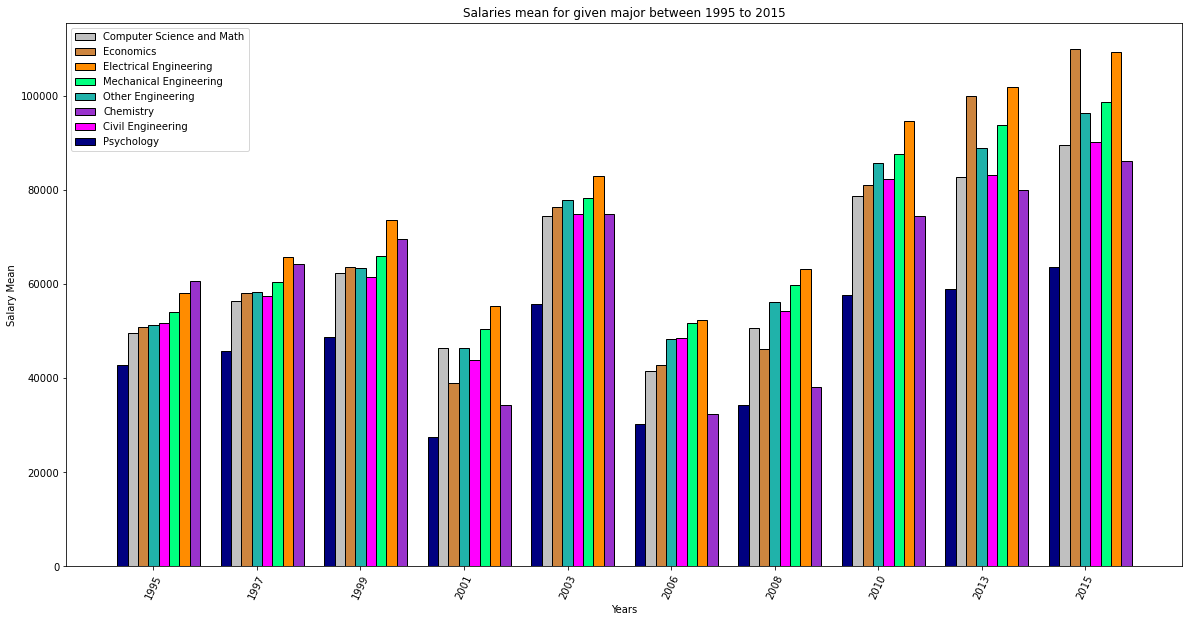

In [2]:
# smp = salary mean plot
smp_data = data
smp_label = "Education.Major"
smp_x = "Year"
smp_y = "Salaries.Mean"
smp_xlabel = "Years"
smp_ylabel = "Salary Mean"
smp_labels = majors_of_interest
smp_title = "Salaries mean for given major between 1995 to 2015"

dm.bar_data(smp_data, smp_label, smp_x, smp_y, smp_xlabel, smp_ylabel, smp_labels, smp_title)

### Observations on the Salary graph for given majors between 1995 to 2015
We can see that certain educations are rising in salary since the start (1995) and up to the end year (2015), such as Electrical Engineering. It could indicate that it has been highly demanded throughout all the years, hence the salary increase.
On the other hand, the salary of the majority of the educations appears to be affected by financial crisis that begun in early 2007. Because of that, most of the educations had a high decrease in the salary during this period, which is also shown on the graph above. But after the financial crisis ending in 2009, the majority of the educations, such as Chemistry, Computer Science and Chemical Engineering are now at a higher salary level than before the crisis.

- Note til os: Lav nogle overordnede konklusioner når vi har de andre grafer med og få den røde tråd frem. Ovenstående er blot "åbenlyse" observationer.

### Plot Demographics.Ethnicity for the majors of interest

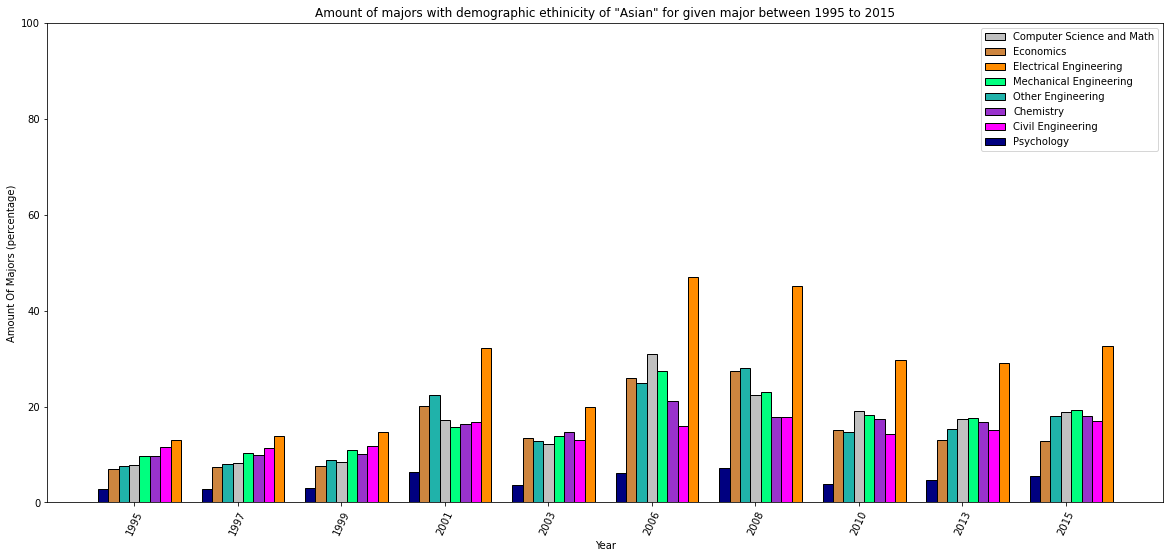

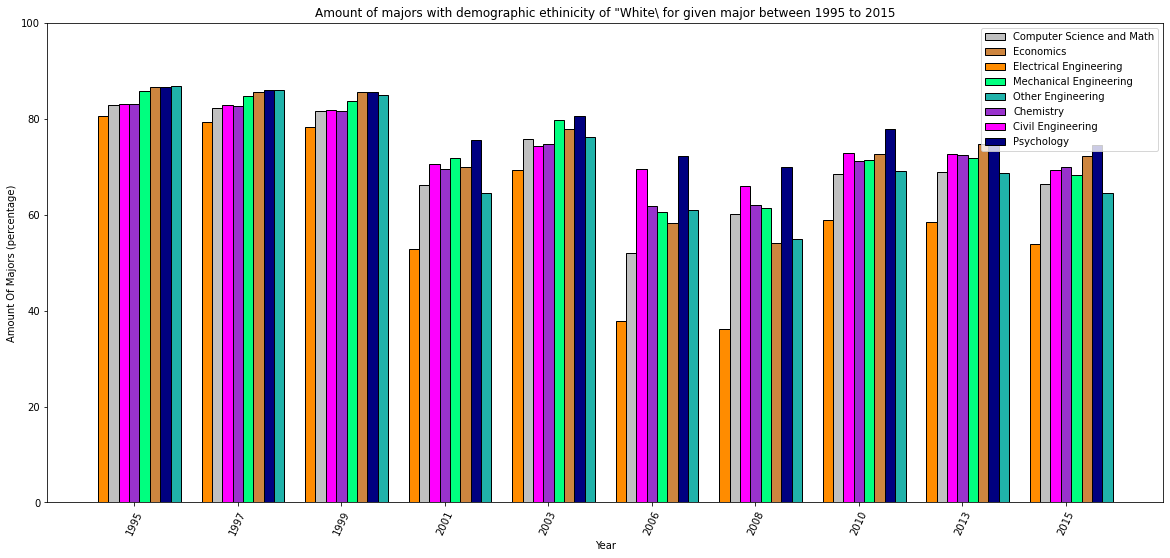

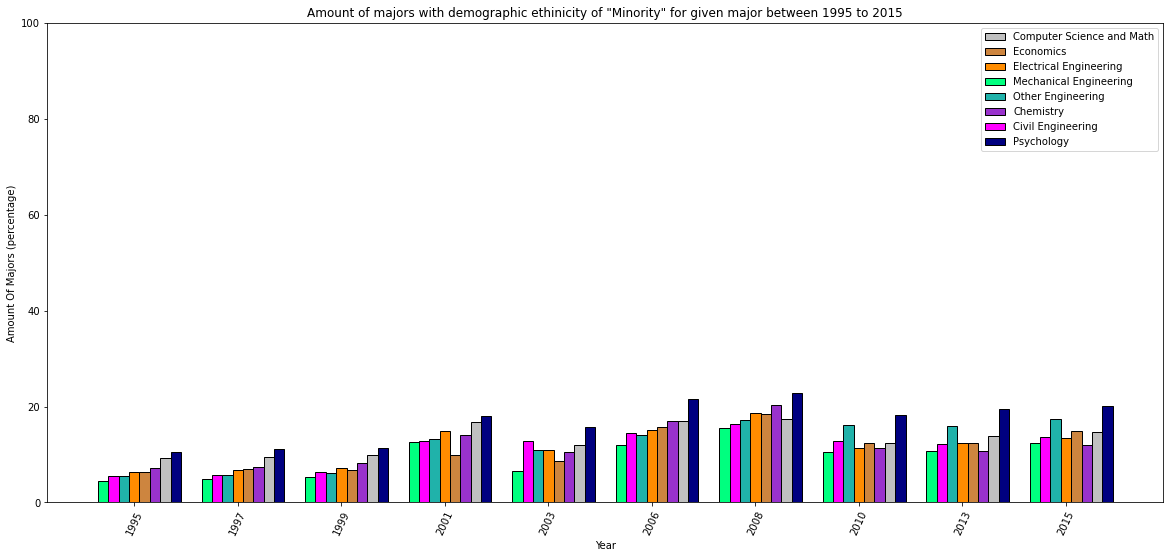

In [3]:
# demographic ethnicity bar
deb_data = data
# create percentage of females and males compared to total demographics
deb_data['asians_percentage'] = dm.create_percentage_column(deb_data, "Demographics.Ethnicity.Asians", "Demographics.Total")
deb_data['whites_percentage'] = dm.create_percentage_column(deb_data, "Demographics.Ethnicity.Whites", "Demographics.Total")
deb_data['minorities_percentage'] = dm.create_percentage_column(deb_data, "Demographics.Ethnicity.Minorities", "Demographics.Total")
deb_label = ["Education.Major", "Education.Major", "Education.Major"]
deb_x = ["Year", "Year", "Year"]
deb_y = ["asians_percentage", "whites_percentage", "minorities_percentage"]
deb_xlabel = ["Year", "Year", "Year"]
deb_ylabel = ["Amount Of Majors (percentage)", "Amount Of Majors (percentage)",  "Amount Of Majors (percentage)"]
deb_labels = majors_of_interest
deb_title = ["Amount of majors with demographic ethinicity of \"Asian\" for given major between 1995 to 2015",
              "Amount of majors with demographic ethinicity of \"White\" for given major between 1995 to 2015", 
              "Amount of majors with demographic ethinicity of \"Minority\" for given major between 1995 to 2015"]

dm.bar_data(deb_data, deb_label, deb_x, deb_y, deb_xlabel, deb_ylabel, deb_labels, deb_title, 3, y_range=[0,100])

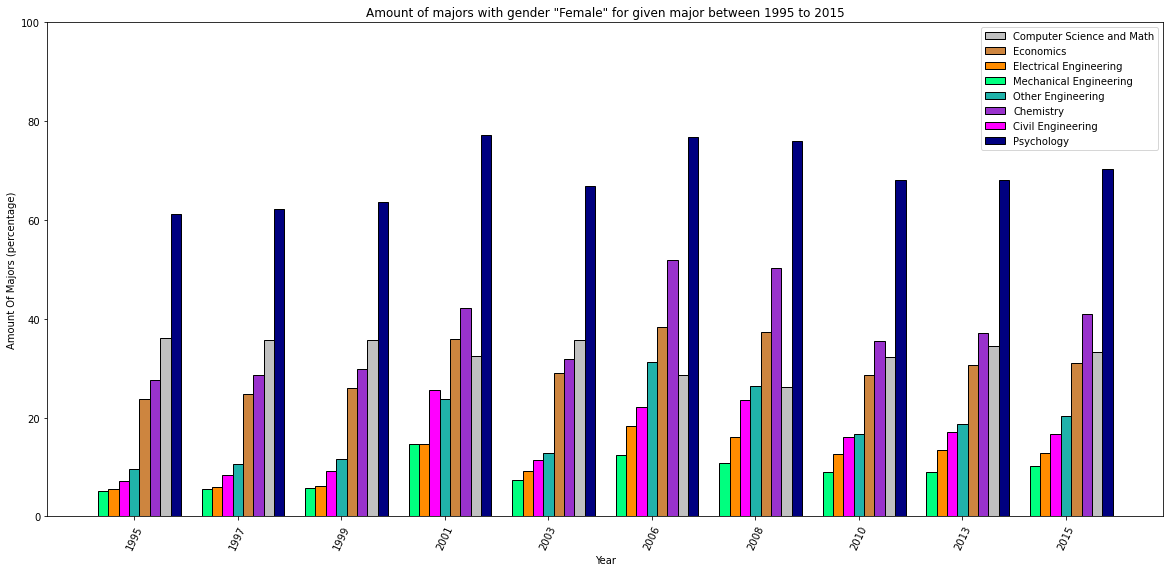

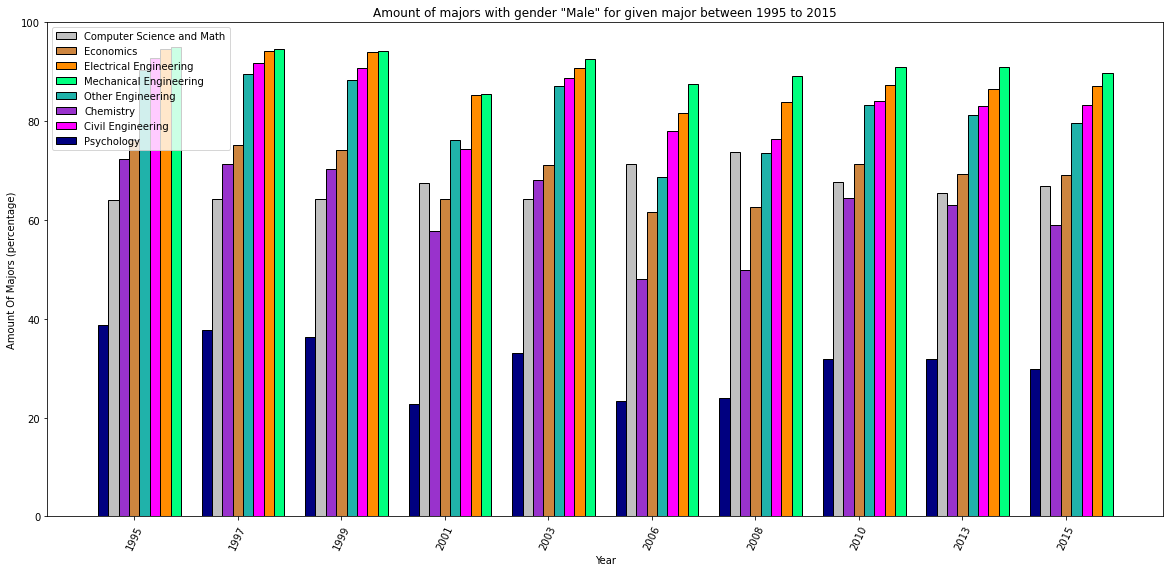

In [4]:
# dgfb = demographics gender female bar
dgfb_data = data
# create percentage of females and males compared to total demographics
dgfb_data['females_percentage'] = dm.create_percentage_column(dgfb_data, "Demographics.Gender.Females", "Demographics.Total")
dgfb_data['males_percentage'] = dm.create_percentage_column(dgfb_data, "Demographics.Gender.Males", "Demographics.Total")
dgfb_label = ["Education.Major", "Education.Major"]
dgfb_x = ["Year", "Year"]
dgfb_y = ["females_percentage", "males_percentage"]
dgfb_xlabel = ["Year", "Year"]
dgfb_ylabel = ["Amount Of Majors (percentage)", "Amount Of Majors (percentage)"]
dgfb_labels = majors_of_interest
dgfb_title = ["Amount of majors with gender \"Female\" for given major between 1995 to 2015", 
              "Amount of majors with gender \"Male\" for given major between 1995 to 2015"]

dm.bar_data(dgfb_data, dgfb_label, dgfb_x, dgfb_y, dgfb_xlabel, dgfb_ylabel, dgfb_labels, dgfb_title, 2, y_range=[0,100])

### Clustering of Data through Meanshift

In [5]:
meanshift_data = data[["Salaries.Mean", "Education.Major", "Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Minorities", "Demographics.Ethnicity.Whites", "Demographics.Gender.Females", "Demographics.Gender.Males"]]
meanshift_data.head()

,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,
49,60697.60,Chemistry,49393,36562,421046,140363,366865
50,51758.63,Civil Engineering,39586,18806,286397,24979,320059
51,49672.61,Computer Science and Math,87310,103423,923026,401758,712760
52,50778.48,Economics,46146,42052,569841,157069,500970
53,58165.47,Electrical Engineering,88354,42981,543890,36905,638321


In [6]:
# Convert All the Major feature to categorical value in numeric form
from sklearn import preprocessing

listOfFeatures = ["Salaries.Mean", "Education.Major", "Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Minorities", "Demographics.Ethnicity.Whites", "Demographics.Gender.Females", "Demographics.Gender.Males"]
le=preprocessing.LabelEncoder()

meanshift_major = data[["Education.Major"]].copy()

meanshift_major['Education.Major'] = le.fit_transform(meanshift_major['Education.Major'].astype(str))
meanshift_major.head()

meanshift_except_major = meanshift_data.copy()
meanshift_except_major = meanshift_except_major.drop(["Education.Major"], axis=1);



major_list = meanshift_major['Education.Major'].to_list()
## Normalization
scaler = preprocessing.MinMaxScaler()
names = meanshift_except_major.columns
d = scaler.fit_transform(meanshift_except_major)
scaled_meanshift_except_major = pd.DataFrame(d, columns=names)

meanshift_data_scaled = scaled_meanshift_except_major.copy()
meanshift_data_scaled['Education.Major'] = major_list
meanshift_data_scaled.head()



,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major
0,0.402679,0.098345,0.050294,0.163470,0.057797,0.214747,0
1,0.294250,0.077304,0.023856,0.109242,0.008750,0.186376,1
2,0.268946,0.179696,0.149847,0.365638,0.168909,0.424408,2
3,0.282361,0.091379,0.058468,0.223396,0.064898,0.296033,3
4,0.371965,0.181935,0.059852,0.212945,0.013820,0.379287,4


In [7]:
# No null value data, so it doesnt need dropping:
meanshift_data[meanshift_data.isnull().any(axis=1)]

,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,


In [8]:
#Meanshift
from sklearn.cluster import MeanShift, estimate_bandwidth

print(estimate_bandwidth(meanshift_data_scaled))

analyzer = MeanShift(bandwidth=2.26) #We will provide only bandwith in hyperparameter . The smaller values of bandwith result in tall skinny kernels & larger values result in short fat kernels.
#We found the bandwith using the estimate_bandiwth function mentioned in below cell.
analyzer.fit(meanshift_data_scaled)
import numpy as np 

#Below is a helper function to help estimate a good value for bandwith based on the data.
"""from sklearn.cluster import estimate_bandwith
estimate_bandwith(meanshift_data)"""   #This runs in quadratic time hence take a long time
'from sklearn.cluster import estimate_bandwith\nestimate_bandwith(meanshift_data)'
labels = analyzer.labels_
np.unique(labels)
print(labels)
print('\n\n',np.unique(labels))

1.450997130232634
[0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 1 1]


 [0 1]


In [9]:

#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.
meanshift_data_scaled['cluster_group'] = np.nan
data_length=len(meanshift_data_scaled)
for i in range(data_length):
    meanshift_data_scaled.iloc[i,meanshift_data_scaled.columns.get_loc('cluster_group')] = labels[i]
meanshift_data_scaled


,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,cluster_group
0,0.402679,0.098345,0.050294,0.163470,0.057797,0.214747,0,0.0
1,0.294250,0.077304,0.023856,0.109242,0.008750,0.186376,1,0.0
2,0.268946,0.179696,0.149847,0.365638,0.168909,0.424408,2,0.0
3,0.282361,0.091379,0.058468,0.223396,0.064898,0.296033,3,0.0
4,0.371965,0.181935,0.059852,0.212945,0.013820,0.379287,4,0.0
...,...,...,...,...,...,...,...,...
75,1.000000,0.348942,0.286400,0.372929,0.169617,0.537316,3,0.0
76,0.990692,0.798047,0.227939,0.244914,0.061640,0.601702,4,0.0
77,0.861632,0.387591,0.171405,0.255057,0.039248,0.509922,5,1.0
78,0.834379,0.498610,0.335973,0.333192,0.111472,0.622889,6,1.0


In [10]:
analyzer = MeanShift(bandwidth=2.26)
#We found the bandwith (2.26) using the estimate_bandiwth function
analyzer.fit(meanshift_data_scaled)

ms = analyzer

ms.fit(meanshift_data_scaled)
labels_data = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels_data)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters))

Number of estimated clusters : 2


In [11]:
#Grouping passengers by Cluster
meanshift_data_scaled_clusters = meanshift_data_scaled.copy()
meanshift_data_scaled_clusters = meanshift_data_scaled.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
meanshift_data_scaled_clusters['Counts'] = pd.Series(meanshift_data_scaled.groupby(['cluster_group']).size())
meanshift_data_scaled_clusters

,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,Counts
cluster_group,,,,,,,,
0.0,0.471410,0.213600,0.104301,0.184021,0.070775,0.281617,2,50
1.0,0.409635,0.161788,0.194034,0.286128,0.173503,0.310723,6,30


In [12]:
# Implementing Cluster with two features (Salary + Major)
meanshift_data_2 = data[["Salaries.Mean", "Education.Major"]]
meanshift_data_2.head()

# Start with normalization parts for Mean, and fit for Major.

le2=preprocessing.LabelEncoder()

meanshift_major_2 = data[["Education.Major"]].copy()

meanshift_major_2['Education.Major'] = le2.fit_transform(meanshift_major_2['Education.Major'].astype(str))
meanshift_major_2.head()

meanshift_2_except_major = meanshift_data_2.copy()
meanshift_2_except_major = meanshift_2_except_major.drop(["Education.Major"], axis=1);


major_list = meanshift_major_2['Education.Major'].to_list()
## Normalization
scaler = preprocessing.MinMaxScaler()
names = meanshift_2_except_major.columns
d = scaler.fit_transform(meanshift_2_except_major)
scaled_meanshift_2_except_major = pd.DataFrame(d, columns=names)

meanshift_data_scaled_2 = scaled_meanshift_2_except_major.copy()
meanshift_data_scaled_2['Education.Major'] = major_list
meanshift_data_scaled_2.head()


# Meanshift proceed..
print(estimate_bandwidth(meanshift_data_scaled_2))

analyzer = MeanShift(bandwidth=2.21) #We will provide only bandwith in hyperparameter . The smaller values of bandwith result in tall skinny kernels & larger values result in short fat kernels.
#We found the bandwith using the estimate_bandiwth function mentioned in below cell.
analyzer.fit(meanshift_data_scaled)
import numpy as np 

#Below is a helper function to help estimate a good value for bandwith based on the data.
"""from sklearn.cluster import estimate_bandwith
estimate_bandwith(meanshift_data)"""   #This runs in quadratic time hence take a long time
'from sklearn.cluster import estimate_bandwith\nestimate_bandwith(meanshift_data)'
labels2 = analyzer.labels_
np.unique(labels2)
print(labels2)
print('\n\n',np.unique(labels2))



1.300234624578324
[0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 1 1]


 [0 1]


In [13]:
#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.
meanshift_data_scaled_2['cluster_group'] = np.nan
data_length=len(meanshift_data_scaled_2)
for i in range(data_length):
    meanshift_data_scaled_2.iloc[i,meanshift_data_scaled_2.columns.get_loc('cluster_group')] = labels[i]
meanshift_data_scaled_2

,Salaries.Mean,Education.Major,cluster_group
0,0.402679,0,0.0
1,0.294250,1,0.0
2,0.268946,2,0.0
3,0.282361,3,0.0
4,0.371965,4,0.0
...,...,...,...
75,1.000000,3,0.0
76,0.990692,4,0.0
77,0.861632,5,1.0
78,0.834379,6,1.0


In [14]:
# Calculate amount of clusters
analyzer = MeanShift(bandwidth=2.26)
#We found the bandwith (2.26) using the estimate_bandiwth function
analyzer.fit(meanshift_data_scaled)

ms = analyzer

ms.fit(meanshift_data_scaled)
labels_data = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels_data)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters))

Number of estimated clusters : 2


In [15]:
#Grouping passengers by Cluster
meanshift_data_scaled_clusters_2 = meanshift_data_scaled_2.copy()
meanshift_data_scaled_clusters_2 = meanshift_data_scaled_2.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
meanshift_data_scaled_clusters_2['Counts'] = pd.Series(meanshift_data_scaled_2.groupby(['cluster_group']).size())
meanshift_data_scaled_clusters_2

,Salaries.Mean,Education.Major,Counts
cluster_group,,,
0.0,0.471410,2,50
1.0,0.409635,6,30


### Prediction

In [16]:
mean_biological = data[(data["Education.Major"] == 'Computer Science and Math')]
# car_reduced_make_fuel_df = car_data_df[(car_data_df[make] == 'Honda') & (car_data_df[fuel_type] == 'Gasoline')]

mean_biological.head()

,Demographics.Total,Year,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,asians_percentage,whites_percentage,minorities_percentage,females_percentage,males_percentage
ID,,,,,,,,,,,,,,
51,1114519,1995,49672.61,Computer Science and Math,87310,103423,923026,401758,712760,7.833873,82.818328,9.279609,36.047658,63.952252
98,1168978,1997,56385.76,Computer Science and Math,95989,111345,961216,417769,751208,8.211361,82.227039,9.524987,35.737969,64.261945
145,1221788,1999,62377.24,Computer Science and Math,101897,121467,997899,437131,784657,8.339990,81.675299,9.941741,35.777975,64.222025
192,99579,2001,46328.30,Computer Science and Math,17085,16637,65857,32410,67169,17.157232,66.135430,16.707338,32.547023,67.452977
246,1379971,2003,74335.41,Computer Science and Math,169137,164110,1046724,493920,886051,12.256562,75.851159,11.892279,35.792056,64.207944


dataset-new       Salaries.Mean  Demographics.Total
Year                                   
1995       49672.61             1114519
1997       56385.76             1168978
1999       62377.24             1221788
2001       46328.30               99579
2003       74335.41             1379971
2006       41451.50              237830
2008       50557.21              144782
2010       78681.35             1981187
2013       82696.72             2242124
2015       89471.56             2489621
Gender: ID
51     1114519
98     1168978
145    1221788
192      99579
246    1379971
286     237830
333     144782
387    1981187
434    2242124
481    2489621
Name: Demographics.Total, dtype: int64
Salary: ID
51     49672.61
98     56385.76
145    62377.24
192    46328.30
246    74335.41
286    41451.50
333    50557.21
387    78681.35
434    82696.72
481    89471.56
Name: Salaries.Mean, dtype: float64


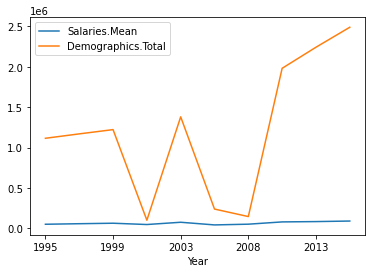

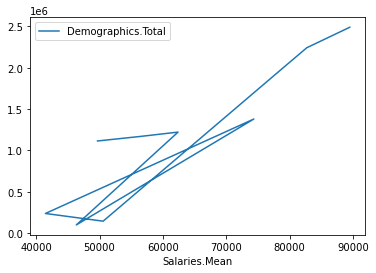

In [17]:
import sklearn
import sklearn.linear_model

data_set_new= mean_biological[["Salaries.Mean", "Year", "Demographics.Total"]]
data_set_new = mean_biological.set_index(mean_biological["Year"])[["Salaries.Mean", "Demographics.Total"]]
data_set_new.plot()
print("dataset-new",data_set_new)
xs = mean_biological['Demographics.Total']
ys = mean_biological['Salaries.Mean']

# Reshape data for X
xs_reshape = np.array(xs).reshape(-1, 1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

model.coef_
#model.intercept_ # what is this?
data_set_new.plot(x=0,y=1) # x= first column and y=second column in dataframe
print("Gender:", xs)
print("Salary:", ys)

#data.plot.scatter(x = 1, y = 3)


In [18]:
# Use the model to predict
predicted = model.predict(xs_reshape)
salary_per_year = model.predict([[0]])
print('Every year the salary will increase/decrease by {}'.format(salary_per_year[0]))
predicted

Every year the salary will increase/decrease by 40946.478041317685


array([61473.36231078, 62476.3722105 , 63449.01131156, 42780.49487609,
       66362.37944113, 45326.76127185, 43613.0304808 , 77435.39950893,
       82241.26069265, 86799.58789572])